In [252]:
import torch
import torchvision
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torch.utils.data import DataLoader, TensorDataset, random_split

In [253]:
# DATASET_URL = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
# DATA_FILENAME = "BostonHousing.csv"
# TARGET_COLUMN = 'medv'

In [254]:
# download_url(DATASET_URL, '.')
df= pd.read_csv('BostonHousing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [255]:
inputs = df.drop(columns='medv', axis=1).values


In [256]:
inputs.shape

(506, 13)

In [257]:
outputs = df['medv'].values
outputs.shape

(506,)

In [258]:
tensor_dataset = TensorDataset(torch.tensor(inputs,dtype=torch.float32),torch.tensor(outputs,dtype=torch.float32))

In [259]:
train_ds, val_ds = random_split(tensor_dataset,[406,100])

In [260]:
batch_size = 64
train_dl = DataLoader(train_ds,batch_size,shuffle=True)
val_dl = DataLoader(val_ds,batch_size*2)

In [261]:
input_size = 13
output_size = 1

In [262]:
class BostonHouse(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    def forward(self,xb):
        out = self.linear(xb)
        return out
    def training_step(self,batch):
        inputs, targets = batch
        out = self(inputs)
        targets = targets.view_as(out)
        loss = F.mse_loss(out, targets)
        return loss
    def validation_step(self,batch):
        inputs,targets = batch
        out = self(inputs)
        targets = targets.view_as(out)
        loss = F.mse_loss(out, targets)
        return {'val_loss':loss.detach()}
    def validation_epoch_end(self,outputs):
        batch_loss = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_loss).mean()
        return {'val_loss':epoch_loss.item()}
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}".format(epoch, result['val_loss']))
        
        
        
model = BostonHouse()
        
        

In [263]:
def evaluate(model,val_dl):
    outputs = [model.validation_step(batch) for batch in val_ds]
    return model.validation_epoch_end(outputs)


In [264]:
def fit( model, train_dl,val_dl,epochs,lr,opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(),lr)
    history = []
    for epoch in range(epochs):
        for batch in train_dl:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        result = evaluate(model, val_dl)
        model.epoch_end(epoch,result)
        history.append(result)
        
    return history  
            

In [265]:
result = evaluate(model,val_dl)
result

{'val_loss': 561.9400634765625}

In [266]:
history = fit(model, train_dl,val_dl,lr=5e-7,epochs=100)

Epoch [0], val_loss: 225.9547
Epoch [1], val_loss: 190.4413
Epoch [2], val_loss: 167.4393
Epoch [3], val_loss: 149.9028
Epoch [4], val_loss: 138.7521
Epoch [5], val_loss: 128.2395
Epoch [6], val_loss: 121.7659
Epoch [7], val_loss: 117.0241
Epoch [8], val_loss: 113.4775
Epoch [9], val_loss: 111.1088
Epoch [10], val_loss: 109.3380
Epoch [11], val_loss: 107.9627
Epoch [12], val_loss: 107.0849
Epoch [13], val_loss: 106.8334
Epoch [14], val_loss: 105.1162
Epoch [15], val_loss: 104.5742
Epoch [16], val_loss: 105.5060
Epoch [17], val_loss: 103.6020
Epoch [18], val_loss: 105.2694
Epoch [19], val_loss: 102.8467
Epoch [20], val_loss: 102.5263
Epoch [21], val_loss: 102.5512
Epoch [22], val_loss: 102.8687
Epoch [23], val_loss: 101.7320
Epoch [24], val_loss: 101.6327
Epoch [25], val_loss: 100.9530
Epoch [26], val_loss: 100.9154
Epoch [27], val_loss: 100.5773
Epoch [28], val_loss: 100.2275
Epoch [29], val_loss: 101.1024
Epoch [30], val_loss: 99.6361
Epoch [31], val_loss: 99.3464
Epoch [32], val_loss

In [268]:
history2 = fit(model, train_dl,val_dl,lr=5e-7,epochs=100)

Epoch [0], val_loss: 85.4969
Epoch [1], val_loss: 85.2994
Epoch [2], val_loss: 85.4768
Epoch [3], val_loss: 85.9689
Epoch [4], val_loss: 85.0395
Epoch [5], val_loss: 85.3048
Epoch [6], val_loss: 85.1346
Epoch [7], val_loss: 84.7113
Epoch [8], val_loss: 85.0121
Epoch [9], val_loss: 84.8087
Epoch [10], val_loss: 84.6671
Epoch [11], val_loss: 84.2630
Epoch [12], val_loss: 84.2438
Epoch [13], val_loss: 84.2132
Epoch [14], val_loss: 84.0298
Epoch [15], val_loss: 84.1555
Epoch [16], val_loss: 83.7876
Epoch [17], val_loss: 83.7537
Epoch [18], val_loss: 84.6485
Epoch [19], val_loss: 83.9764
Epoch [20], val_loss: 83.7916
Epoch [21], val_loss: 83.7383
Epoch [22], val_loss: 83.4302
Epoch [23], val_loss: 83.7811
Epoch [24], val_loss: 83.1280
Epoch [25], val_loss: 83.2138
Epoch [26], val_loss: 82.9009
Epoch [27], val_loss: 82.9610
Epoch [28], val_loss: 82.7182
Epoch [29], val_loss: 83.4632
Epoch [30], val_loss: 82.9142
Epoch [31], val_loss: 82.7968
Epoch [32], val_loss: 82.4711
Epoch [33], val_loss

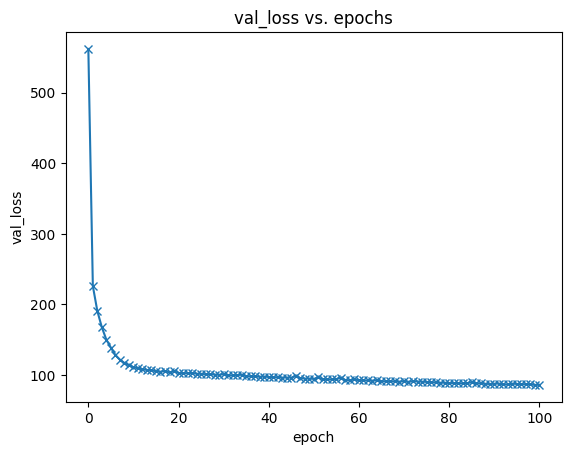

In [267]:
losses = [r['val_loss'] for r in [result] + history]
plt.plot(losses, '-x')
plt.xlabel('epoch')
plt.ylabel('val_loss')
plt.title('val_loss vs. epochs');

In [ ]:
torch.save(model.state_dict(), 'housing-linear.pth')